In [44]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff
from gene_expression_plots import survey_strain_amln_gene_exp, survey_strain_ccl4_gene_exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

In [46]:
atacDirectory = '/home/h1bennet/strains/results/06_Strains_Control_Cohort2_ATAC/'
h3k27acDirectory = '/home/h1bennet/strains/results/06b_Strains_Control_Combined_H3K27Ac/'
workingDirectory = '/home/h1bennet/strains/results/10_Strains_Manuscript_Prep/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [48]:
if not os.path.isdir('./maggie_heatmaps'):
    os.mkdir('./maggie_heatmaps')

#  Import ATAC Maggie Results

In [26]:
filtered_frame_atac = pd.read_csv(atacDirectory+'/maggie_output/maggie_merged_motif_log10pvalues.txt',
                                  sep='\t', index_col=0)

In [33]:
filtered_frame_h3k27ac = pd.read_csv(h3k27acDirectory+'/maggie_output/maggie_merged_motif_log10pvalues.txt',
                                     sep='\t', index_col=0)

# Aggregate results MAGGIE

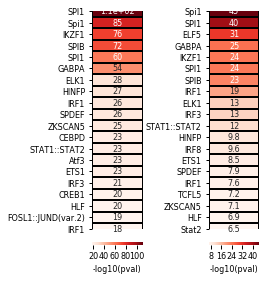

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(3,5))
plt.subplots_adjust(wspace=1.3)

filtered_frame_atac = filtered_frame_atac.sort_values('all_200bp', ascending=False)

hm = sns.heatmap(
    filtered_frame_atac.loc[:, ['all_200bp']].iloc[:20, :],
    cmap='Reds',
    linewidths=1,
    linecolor='k',
    annot=True,
    cbar_kws={'label': '-log10(pval)',
              'orientation': 'horizontal',
              'pad':0.05},
    # square=True,
    #center=0,
    xticklabels=0,
    ax=axs[0])

filtered_frame_h3k27ac = filtered_frame_h3k27ac.sort_values('all_200bp', ascending=False)

hm = sns.heatmap(
    filtered_frame_h3k27ac.loc[:, ['all_200bp']].iloc[:20, :],
    cmap='Reds',
    linewidths=1,
    linecolor='k',
    annot=True,
    cbar_kws={'label': '-log10(pval)',
              'orientation': 'horizontal',
              'pad':0.05},
    # square=True,
    #center=0,
    xticklabels=0,
    ax=axs[1])


# hm.set_yticklabels(size=12, labels=filtered_filtered_frame.index.values, rotation=0);

plt.savefig('./maggie_heatmaps/maggie_activatingmotifs.pdf', bbox_inches='tight')

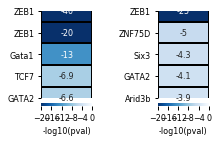

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(3,2))
plt.subplots_adjust(wspace=1.3)

filtered_frame_atac = filtered_frame_atac.sort_values('all_200bp', ascending=True)

hm = sns.heatmap(
    filtered_frame_atac.loc[:, ['all_200bp']].iloc[:5, :],
    cmap='Blues_r',
    linewidths=1,
    linecolor='k',
    annot=True,
    vmin=-20,
    vmax=0,
    cbar_kws={'label': '-log10(pval)',
              'orientation': 'horizontal',
              'pad':0.05},
    # square=True,
    #center=0,
    xticklabels=0,
    ax=axs[0])

filtered_frame_h3k27ac = filtered_frame_h3k27ac.sort_values('all_200bp', ascending=True)

hm = sns.heatmap(
    filtered_frame_h3k27ac.loc[:, ['all_200bp']].iloc[:5, :],
    cmap='Blues_r',
    linewidths=1,
    linecolor='k',
    annot=True,
    vmin=-20,
    vmax=0,
    cbar_kws={'label': '-log10(pval)',
              'orientation': 'horizontal',
              'pad':0.05},
    # square=True,
    #center=0,
    xticklabels=0,
    ax=axs[1])


# hm.set_yticklabels(size=12, labels=filtered_filtered_frame.index.values, rotation=0);

plt.savefig('./maggie_heatmaps/maggie_repressing_motifs.pdf', bbox_inches='tight')